In [ ]:
# Hyperparameter Tuning in Python
## 1. Hyperparameters and Parameters
## 2. Grid search
## 3. Random Search
## 4. Informed Search

## 1. Hyperparameters and Parameters

**Introduction & 'Parameters'**

**Parameters in Logistic Regression**

Now that you have had a chance to explore what a parameter is, let us apply this knowledge. It is important to be able to review any new algorithm and identify which elements are parameters and hyperparameters.

Which of the following is a parameter for the Scikit Learn logistic regression model? Here we mean conceptually based on the theory introduced in this course. NOT what the Scikit Learn documentation calls a parameter or attribute.

**Possible Answers**

- [ ] n_jobs
- [x] coef_
- [ ] class_weight
- [ ] LogisticRegression()


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/credit-card-full.csv'
df = pd.read_csv(filename)
sex = pd.get_dummies(df['SEX'], prefix = 'SEX')
education = pd.get_dummies(df['EDUCATION'], prefix = 'EDUCATION')
marriage = pd.get_dummies(df['MARRIAGE'], prefix = 'MARRIAGE')
df2 = pd.concat([df, sex, education, marriage], axis = 1)
df2 = df2.sample(3200)
X = df2[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']]
y = df2['default payment next month']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

from sklearn.linear_model import LogisticRegression
log_reg_clf = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

In [6]:
# Extracting a Logistic Regression parameter

# Create a list of original variable names from the training DataFrame
original_variables = X_train.columns

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
print(coefficient_df)

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by='Coefficient', axis=0, ascending=False)[0:3]
print(top_three_df)

       Variable  Coefficient
0     LIMIT_BAL    -0.000005
1           AGE    -0.005743
2         PAY_0     0.000911
3         PAY_2     0.000830
4         PAY_3     0.000736
5         PAY_4     0.000666
6         PAY_5     0.000503
7         PAY_6     0.000442
8     BILL_AMT1    -0.000041
9     BILL_AMT2     0.000047
10    BILL_AMT3    -0.000010
11    BILL_AMT4     0.000015
12    BILL_AMT5    -0.000016
13    BILL_AMT6     0.000013
14     PAY_AMT1    -0.000058
15     PAY_AMT2     0.000002
16     PAY_AMT3    -0.000065
17     PAY_AMT4     0.000008
18     PAY_AMT5    -0.000034
19     PAY_AMT6     0.000004
20        SEX_2    -0.000268
21  EDUCATION_1    -0.000009
22  EDUCATION_2    -0.000166
23  EDUCATION_3    -0.000009
24  EDUCATION_4    -0.000004
25  EDUCATION_5    -0.000008
26  EDUCATION_6     0.000002
27   MARRIAGE_1     0.000010
28   MARRIAGE_2    -0.000196
29   MARRIAGE_3    -0.000004
  Variable  Coefficient
2    PAY_0     0.000911
3    PAY_2     0.000830
4    PAY_3     0.000736


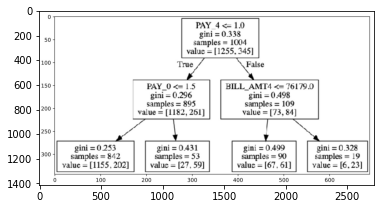

This node split on feature PAY_AMT5, at a value of 9343.0


In [7]:
# Extracting a Random Forest parameter

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(X_train, y_train)

from skimage import io
import matplotlib.pyplot as plt

# Extract the 7th tree from the random forest
chosen_tree = rf_clf.estimators_[6]

# visualize the graph
image_url = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/images/tree_viz_image.jpg'
tree_viz_image = io.imread(image_url)
imgplot = plt.imshow(tree_viz_image)
plt.show()

# Extract the parameters and level of the top node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]

# Print out the feature and level
print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))

In [8]:
# Introducing Hyperparameters

**Hyperparameters in Random Forests**

As you saw, there are many different hyperparameters available in a Random Forest model using Scikit Learn. Here you can remind yourself how to differentiate between a hyperparameter and a parameter, and easily check whether something is a hyperparameter.

You can create a random forest estimator yourself from the imported Scikit Learn package. Then print this estimator out to see the hyperparameters and their values.

Which of the following is a hyperparameter for the Scikit Learn random forest model?

**Possible Answers**

- [x] oob_score
- [ ] classes_
- [ ] trees
- [ ] random_level

That's correct! oob_score set to True or False decides whether to use out-of-bag samples to estimate the generalization accuracy.

In [9]:
# Exploring Random Forest Hyperparameters

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
rf_clf_old = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False).fit(X_train, y_train)
rf_old_predictions = rf_clf_old.predict(X_test)

# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  confusion_matrix(y_test, rf_old_predictions),
  accuracy_score(y_test, rf_old_predictions))) 

# Create a new random forest classifier with better hyperparamaters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# Fit this to the data and obtain predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

# Assess the new model (using new predictions!)
print("Confusion Matrix: \n\n", confusion_matrix(y_test, rf_new_predictions))
print("Accuracy Score: \n\n", accuracy_score(y_test, rf_new_predictions))

RandomForestClassifier(n_estimators=5, random_state=42)
Confusion Matrix: 

 [[1088  145]
 [ 225  142]] 
 Accuracy Score: 

 0.76875
Confusion Matrix: 

 [[1142   91]
 [ 231  136]]
Accuracy Score: 

 0.79875


In [10]:
# Hyperparameters of KNN

from sklearn.neighbors import KNeighborsClassifier

# Build a knn estimator for each value of n_neighbours
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# Fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# Get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))

The accuracy of 5, 10, 20 neighbours was 0.7175, 0.754375, 0.761875


In [11]:
# Setting & Analyzing Hyperparameter Values

# Automating Hyperparameter Choice

from sklearn.ensemble import GradientBoostingClassifier

# Set the learning rates & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=learning_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Save the learning rate and accuracy score
    results_list.append([learning_rate, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

   learning_rate  accuracy
0          0.001  0.770625
1          0.010  0.812500
2          0.050  0.811250
3          0.100  0.808125
4          0.200  0.805000
5          0.500  0.791875


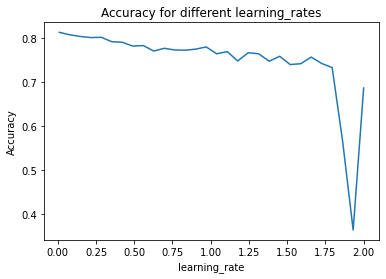

In [12]:
# Building Learning Curves

# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
  	# Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results    
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()

## 2. Grid search

In [13]:
# Introducing Grid Search

# Build Grid Search functions

# Create the function
def gbm_grid_search(learn_rate, max_depth):

	# Create the model
    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth= max_depth)
    
    # Use the model to make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Return the hyperparameters and score
    return([learn_rate, max_depth, accuracy_score(y_test, predictions)])

In [14]:
# Iteratively tune multiple hyperparameters

# Create the relevant lists
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list =[2, 4, 6]

# Create the for loop
for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        results_list.append(gbm_grid_search(learn_rate, max_depth))

# Print the results
print(results_list)

[[0.01, 2, 0.8125], [0.01, 4, 0.809375], [0.01, 6, 0.80875], [0.1, 2, 0.8125], [0.1, 4, 0.801875], [0.1, 6, 0.799375], [0.5, 2, 0.7925], [0.5, 4, 0.78875], [0.5, 6, 0.788125]]


In [15]:
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2,4,6]

# Extend the function input
def gbm_grid_search_extended(learn_rate, max_depth, subsample):

	# Extend the model creation section
    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth, subsample=subsample)
    
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Extend the return part
    return([learn_rate, max_depth, subsample, accuracy_score(y_test, predictions)])  

In [16]:
results_list = []

# Create the new list to test
subsample_list = [0.4 , 0.6]

for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
    
    	# Extend the for loop
        for subsample in subsample_list:
        	
            # Extend the results to include the new hyperparameter
            results_list.append(gbm_grid_search_extended(learn_rate, max_depth, subsample))
            
# Print results
print(results_list)     

[[0.01, 2, 0.4, 0.800625], [0.01, 2, 0.6, 0.80875], [0.01, 4, 0.4, 0.815625], [0.01, 4, 0.6, 0.815625], [0.01, 6, 0.4, 0.808125], [0.01, 6, 0.6, 0.808125], [0.1, 2, 0.4, 0.808125], [0.1, 2, 0.6, 0.8075], [0.1, 4, 0.4, 0.799375], [0.1, 4, 0.6, 0.79625], [0.1, 6, 0.4, 0.7925], [0.1, 6, 0.6, 0.79125], [0.5, 2, 0.4, 0.778125], [0.5, 2, 0.6, 0.7725], [0.5, 4, 0.4, 0.721875], [0.5, 4, 0.6, 0.753125], [0.5, 6, 0.4, 0.713125], [0.5, 6, 0.6, 0.776875]]


**How Many Models?**

Adding more hyperparameters or values, you increase the amount of models created but the increases is not linear it is proportional to how many values and hyperparameters you already have.

How many models would be created when running a grid search over the following hyperparameters and values for a GBM algorithm?

- learning_rate = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2]
- max_depth = [4,6,8,10,12,14,16,18, 20]
- subsample = [0.4, 0.6, 0.7, 0.8, 0.9]
- max_features = ['auto', 'sqrt', 'log2']

These lists are in your console so you can utilize properties of them to help you!

**Possible Answers**

- [ ] 26
- [ ] 9 of one model, 9 of another
- [ ] 1 large model
- [x] 1215

Excellent! For every value of one hyperparameter, we test EVERY value of EVERY other hyperparameter. So you correctly multiplied the number of values (the lengths of the lists).

In [17]:
# Grid Search with Scikit Learn

**GridSearchCV inputs**

Let's test your knowledge of GridSeachCV inputs by answering the question below.

Three GridSearchCV objects are available in the console, named model_1, model_2, model_3. Note that there is no data available to fit these models. Instead, you must answer by looking at their construct.

```
Model #1:
 GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = {'max_depth': [2, 4, 8, 15], 'max_features': ['auto', 'sqrt']},
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True, return_train_score=True) 


Model #2:
 GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = {'n_neighbors': [5, 10, 20], 'algorithm': ['ball_tree', 'brute']},
    scoring='accuracy',
    n_jobs=8,
    cv=10,
    refit=False) 


Model #3:
 GridSearchCV(
    estimator = GradientBoostingClassifier(),
    param_grid = {'number_attempts': [2, 4, 6], 'max_depth': [3, 6, 9, 12]},
    scoring='accuracy',
    n_jobs=2,
    cv=7,
    refit=True) 
```

Which of these GridSearchCV objects would not work when we try to fit it?

**Possible Answers**

- [ ] model_1 would not work when we try to fit it.
- [ ] model_2 would not work when we try to fit it.
- [x] model_3 would not work when we try to fit it.
- [ ] None - they will all work when we try to fit them.

In [18]:
# GridSearchCV with Scikit Learn

from sklearn.model_selection import GridSearchCV

# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion = 'entropy')

# Create the parameter grid
param_grid = {'max_depth': [2, 4, 8, 15], 'max_features':['auto', 'sqrt'], 'n_estimators': [1, 5, 10, 15]} 

# Create a GridSearchCV object
grid_rf_class = GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True, return_train_score=True)

print(grid_rf_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [1, 5, 10, 15]},
             return_train_score=True, scoring='roc_auc')


In [19]:
# Understanding a grid search output

**Using the best outputs**

Which of the following parameters must be set in order to be able to directly use the best_estimator_ property for predictions?

**Possible Answers**

- [ ] return_train_score = True
- [x] refit = True
- [ ] refit = False
- [ ] verbose = 1


In [20]:
# Exploring the grid search results

grid_rf_class.fit(X_train, y_train)

# Read the cv_results property into a dataframe & print it out
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
print(cv_results_df)

# Get and show the column with dictionaries of the hyperparameters used
column = cv_results_df.loc[:, ["params"]]
print(column)

# Get and show the row that had the best mean test score
best_row = cv_results_df[cv_results_df["rank_test_score"] == 1]
print(best_row)

    mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0        0.024659      0.003676  ...          0.678716         0.033937
1        0.046929      0.006697  ...          0.792136         0.008786
2        0.094064      0.032049  ...          0.798427         0.012037
3        0.120302      0.016231  ...          0.806910         0.006321
4        0.016928      0.000750  ...          0.676401         0.064615
5        0.050497      0.003481  ...          0.784869         0.021302
6        0.084669      0.001498  ...          0.798149         0.011563
7        0.124396      0.035332  ...          0.803408         0.006962
8        0.026813      0.003069  ...          0.771233         0.007847
9        0.061995      0.004926  ...          0.829721         0.007756
10       0.109284      0.022501  ...          0.845600         0.006826
11       0.157043      0.013040  ...          0.849436         0.010314
12       0.020359      0.002656  ...          0.746297         0

In [21]:
# Analyzing the best results

# Print out the ROC_AUC score from the best-performing square
best_score = grid_rf_class.best_score_
print(best_score)

# Create a variable from the row related to the best-performing square
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
print(best_row)

# Get the n_estimators parameter from the best-performing square and print
best_n_estimators = grid_rf_class.best_params_["n_estimators"]
print(best_n_estimators)

0.79589650626236
    mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
11       0.157043       0.01304  ...          0.849436         0.010314

[1 rows x 23 columns]
15


In [22]:
# Using the best results

# See what type of object the best_estimator_ property is
print(type(grid_rf_class.best_estimator_))

# Create an array of predictions directly using the best_estimator_ property
predictions = grid_rf_class.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])

# Now create a confusion matrix 
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

# Get the ROC-AUC score
predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]
print("ROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0 0 1 0 0]
Confusion Matrix 
 [[1167   66]
 [ 253  114]]
ROC-AUC Score 
 0.7478757422471499


## 3. Random Search

In [23]:
# Introducing Random Search

# Randomly Sample Hyperparameters

from itertools import product

# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01,1.5,200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10,41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a random search.
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 250, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
print(combinations_random_chosen)

[[0.7213065326633166, 29], [1.0881909547738693, 39], [0.9309547738693467, 23], [0.15974874371859296, 19], [0.024974874371859294, 25], [0.9908542713567839, 40], [0.945929648241206, 25], [0.42180904522613066, 18], [0.23462311557788945, 23], [0.15974874371859296, 37], [0.20467336683417087, 19], [0.3918592964824121, 37], [0.039949748743718594, 32], [0.6239698492462311, 13], [0.09984924623115578, 15], [0.43678391959798996, 26], [1.327788944723618, 37], [1.3352763819095477, 30], [1.095678391959799, 26], [0.039949748743718594, 37], [0.7362814070351759, 16], [0.9010050251256281, 20], [0.9159798994974874, 12], [0.43678391959798996, 20], [0.6464321608040201, 19], [0.024974874371859294, 34], [0.414321608040201, 16], [0.33195979899497485, 10], [0.287035175879397, 14], [0.5790452261306532, 18], [0.5865326633165829, 24], [0.6239698492462311, 15], [0.21964824120603016, 38], [0.7287939698492463, 20], [1.3577386934673366, 16], [0.4592462311557789, 36], [0.15226130653266332, 12], [1.2753768844221105, 26

In [24]:
# Randomly Search with Random Forest

import random
from itertools import product

# Create lists for criterion and max_features
criterion_list = ["gini", "entropy"]
max_feature_list = ["auto", "sqrt", "log2", None]

# Create a list of values for the max_depth hyperparameter
max_depth_list = list(range(3,56))

# Combination list
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 150)

# Print the result
print(combinations_random_chosen)

[['entropy', 'sqrt', 50], ['entropy', 'auto', 9], ['entropy', 'auto', 18], ['entropy', 'sqrt', 36], ['gini', 'sqrt', 13], ['entropy', 'log2', 51], ['gini', 'sqrt', 6], ['gini', None, 24], ['gini', 'auto', 4], ['gini', 'auto', 12], ['gini', None, 28], ['entropy', 'sqrt', 11], ['entropy', None, 26], ['entropy', 'auto', 25], ['gini', 'auto', 3], ['entropy', 'sqrt', 43], ['entropy', 'log2', 48], ['entropy', 'log2', 34], ['entropy', 'sqrt', 29], ['entropy', 'auto', 15], ['gini', 'auto', 48], ['entropy', 'sqrt', 37], ['entropy', 'log2', 29], ['entropy', None, 54], ['entropy', 'sqrt', 23], ['entropy', 'sqrt', 54], ['gini', None, 16], ['entropy', 'sqrt', 46], ['entropy', 'sqrt', 45], ['gini', 'log2', 15], ['entropy', 'sqrt', 38], ['entropy', None, 15], ['gini', None, 20], ['entropy', 'log2', 26], ['gini', 'sqrt', 3], ['entropy', 'auto', 53], ['gini', 'auto', 29], ['gini', 'sqrt', 23], ['entropy', None, 42], ['entropy', 'log2', 10], ['entropy', 'sqrt', 51], ['entropy', 'log2', 43], ['gini', 'sq

2000


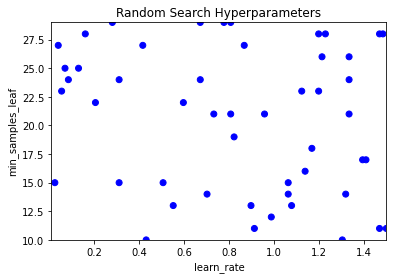

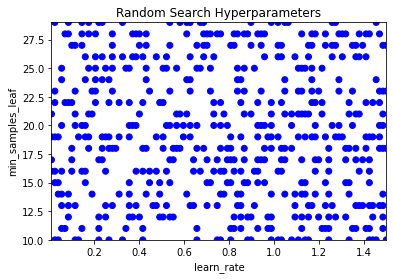

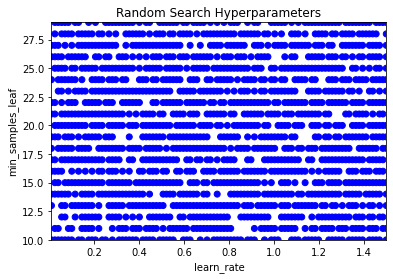

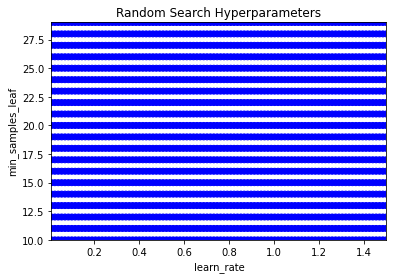

In [25]:
# Visualizing a Random Search

combinations_list = [[0.01, 10], [0.01, 11], [0.01, 12], [0.01, 13], [0.01, 14], [0.01, 15], [0.01, 16], [0.01, 17], [0.01, 18], [0.01, 19], [0.01, 20], [0.01, 21], [0.01, 22], [0.01, 23], [0.01, 24], [0.01, 25], [0.01, 26], [0.01, 27], [0.01, 28], [0.01, 29], [0.025050505050505052, 10], [0.025050505050505052, 11], [0.025050505050505052, 12], [0.025050505050505052, 13], [0.025050505050505052, 14], [0.025050505050505052, 15], [0.025050505050505052, 16], [0.025050505050505052, 17], [0.025050505050505052, 18], [0.025050505050505052, 19], [0.025050505050505052, 20], [0.025050505050505052, 21], [0.025050505050505052, 22], [0.025050505050505052, 23], [0.025050505050505052, 24], [0.025050505050505052, 25], [0.025050505050505052, 26], [0.025050505050505052, 27], [0.025050505050505052, 28], [0.025050505050505052, 29], [0.0401010101010101, 10], [0.0401010101010101, 11], [0.0401010101010101, 12], [0.0401010101010101, 13], [0.0401010101010101, 14], [0.0401010101010101, 15], [0.0401010101010101, 16], [0.0401010101010101, 17], [0.0401010101010101, 18], [0.0401010101010101, 19], [0.0401010101010101, 20], [0.0401010101010101, 21], [0.0401010101010101, 22], [0.0401010101010101, 23], [0.0401010101010101, 24], [0.0401010101010101, 25], [0.0401010101010101, 26], [0.0401010101010101, 27], [0.0401010101010101, 28], [0.0401010101010101, 29], [0.05515151515151515, 10], [0.05515151515151515, 11], [0.05515151515151515, 12], [0.05515151515151515, 13], [0.05515151515151515, 14], [0.05515151515151515, 15], [0.05515151515151515, 16], [0.05515151515151515, 17], [0.05515151515151515, 18], [0.05515151515151515, 19], [0.05515151515151515, 20], [0.05515151515151515, 21], [0.05515151515151515, 22], [0.05515151515151515, 23], [0.05515151515151515, 24], [0.05515151515151515, 25], [0.05515151515151515, 26], [0.05515151515151515, 27], [0.05515151515151515, 28], [0.05515151515151515, 29], [0.0702020202020202, 10], [0.0702020202020202, 11], [0.0702020202020202, 12], [0.0702020202020202, 13], [0.0702020202020202, 14], [0.0702020202020202, 15], [0.0702020202020202, 16], [0.0702020202020202, 17], [0.0702020202020202, 18], [0.0702020202020202, 19], [0.0702020202020202, 20], [0.0702020202020202, 21], [0.0702020202020202, 22], [0.0702020202020202, 23], [0.0702020202020202, 24], [0.0702020202020202, 25], [0.0702020202020202, 26], [0.0702020202020202, 27], [0.0702020202020202, 28], [0.0702020202020202, 29], [0.08525252525252525, 10], [0.08525252525252525, 11], [0.08525252525252525, 12], [0.08525252525252525, 13], [0.08525252525252525, 14], [0.08525252525252525, 15], [0.08525252525252525, 16], [0.08525252525252525, 17], [0.08525252525252525, 18], [0.08525252525252525, 19], [0.08525252525252525, 20], [0.08525252525252525, 21], [0.08525252525252525, 22], [0.08525252525252525, 23], [0.08525252525252525, 24], [0.08525252525252525, 25], [0.08525252525252525, 26], [0.08525252525252525, 27], [0.08525252525252525, 28], [0.08525252525252525, 29], [0.1003030303030303, 10], [0.1003030303030303, 11], [0.1003030303030303, 12], [0.1003030303030303, 13], [0.1003030303030303, 14], [0.1003030303030303, 15], [0.1003030303030303, 16], [0.1003030303030303, 17], [0.1003030303030303, 18], [0.1003030303030303, 19], [0.1003030303030303, 20], [0.1003030303030303, 21], [0.1003030303030303, 22], [0.1003030303030303, 23], [0.1003030303030303, 24], [0.1003030303030303, 25], [0.1003030303030303, 26], [0.1003030303030303, 27], [0.1003030303030303, 28], [0.1003030303030303, 29], [0.11535353535353535, 10], [0.11535353535353535, 11], [0.11535353535353535, 12], [0.11535353535353535, 13], [0.11535353535353535, 14], [0.11535353535353535, 15], [0.11535353535353535, 16], [0.11535353535353535, 17], [0.11535353535353535, 18], [0.11535353535353535, 19], [0.11535353535353535, 20], [0.11535353535353535, 21], [0.11535353535353535, 22], [0.11535353535353535, 23], [0.11535353535353535, 24], [0.11535353535353535, 25], [0.11535353535353535, 26], [0.11535353535353535, 27], [0.11535353535353535, 28], [0.11535353535353535, 29], [0.1304040404040404, 10], [0.1304040404040404, 11], [0.1304040404040404, 12], [0.1304040404040404, 13], [0.1304040404040404, 14], [0.1304040404040404, 15], [0.1304040404040404, 16], [0.1304040404040404, 17], [0.1304040404040404, 18], [0.1304040404040404, 19], [0.1304040404040404, 20], [0.1304040404040404, 21], [0.1304040404040404, 22], [0.1304040404040404, 23], [0.1304040404040404, 24], [0.1304040404040404, 25], [0.1304040404040404, 26], [0.1304040404040404, 27], [0.1304040404040404, 28], [0.1304040404040404, 29], [0.14545454545454545, 10], [0.14545454545454545, 11], [0.14545454545454545, 12], [0.14545454545454545, 13], [0.14545454545454545, 14], [0.14545454545454545, 15], [0.14545454545454545, 16], [0.14545454545454545, 17], [0.14545454545454545, 18], [0.14545454545454545, 19], [0.14545454545454545, 20], [0.14545454545454545, 21], [0.14545454545454545, 22], [0.14545454545454545, 23], [0.14545454545454545, 24], [0.14545454545454545, 25], [0.14545454545454545, 26], [0.14545454545454545, 27], [0.14545454545454545, 28], [0.14545454545454545, 29], [0.1605050505050505, 10], [0.1605050505050505, 11], [0.1605050505050505, 12], [0.1605050505050505, 13], [0.1605050505050505, 14], [0.1605050505050505, 15], [0.1605050505050505, 16], [0.1605050505050505, 17], [0.1605050505050505, 18], [0.1605050505050505, 19], [0.1605050505050505, 20], [0.1605050505050505, 21], [0.1605050505050505, 22], [0.1605050505050505, 23], [0.1605050505050505, 24], [0.1605050505050505, 25], [0.1605050505050505, 26], [0.1605050505050505, 27], [0.1605050505050505, 28], [0.1605050505050505, 29], [0.17555555555555558, 10], [0.17555555555555558, 11], [0.17555555555555558, 12], [0.17555555555555558, 13], [0.17555555555555558, 14], [0.17555555555555558, 15], [0.17555555555555558, 16], [0.17555555555555558, 17], [0.17555555555555558, 18], [0.17555555555555558, 19], [0.17555555555555558, 20], [0.17555555555555558, 21], [0.17555555555555558, 22], [0.17555555555555558, 23], [0.17555555555555558, 24], [0.17555555555555558, 25], [0.17555555555555558, 26], [0.17555555555555558, 27], [0.17555555555555558, 28], [0.17555555555555558, 29], [0.1906060606060606, 10], [0.1906060606060606, 11], [0.1906060606060606, 12], [0.1906060606060606, 13], [0.1906060606060606, 14], [0.1906060606060606, 15], [0.1906060606060606, 16], [0.1906060606060606, 17], [0.1906060606060606, 18], [0.1906060606060606, 19], [0.1906060606060606, 20], [0.1906060606060606, 21], [0.1906060606060606, 22], [0.1906060606060606, 23], [0.1906060606060606, 24], [0.1906060606060606, 25], [0.1906060606060606, 26], [0.1906060606060606, 27], [0.1906060606060606, 28], [0.1906060606060606, 29], [0.20565656565656565, 10], [0.20565656565656565, 11], [0.20565656565656565, 12], [0.20565656565656565, 13], [0.20565656565656565, 14], [0.20565656565656565, 15], [0.20565656565656565, 16], [0.20565656565656565, 17], [0.20565656565656565, 18], [0.20565656565656565, 19], [0.20565656565656565, 20], [0.20565656565656565, 21], [0.20565656565656565, 22], [0.20565656565656565, 23], [0.20565656565656565, 24], [0.20565656565656565, 25], [0.20565656565656565, 26], [0.20565656565656565, 27], [0.20565656565656565, 28], [0.20565656565656565, 29], [0.2207070707070707, 10], [0.2207070707070707, 11], [0.2207070707070707, 12], [0.2207070707070707, 13], [0.2207070707070707, 14], [0.2207070707070707, 15], [0.2207070707070707, 16], [0.2207070707070707, 17], [0.2207070707070707, 18], [0.2207070707070707, 19], [0.2207070707070707, 20], [0.2207070707070707, 21], [0.2207070707070707, 22], [0.2207070707070707, 23], [0.2207070707070707, 24], [0.2207070707070707, 25], [0.2207070707070707, 26], [0.2207070707070707, 27], [0.2207070707070707, 28], [0.2207070707070707, 29], [0.23575757575757578, 10], [0.23575757575757578, 11], [0.23575757575757578, 12], [0.23575757575757578, 13], [0.23575757575757578, 14], [0.23575757575757578, 15], [0.23575757575757578, 16], [0.23575757575757578, 17], [0.23575757575757578, 18], [0.23575757575757578, 19], [0.23575757575757578, 20], [0.23575757575757578, 21], [0.23575757575757578, 22], [0.23575757575757578, 23], [0.23575757575757578, 24], [0.23575757575757578, 25], [0.23575757575757578, 26], [0.23575757575757578, 27], [0.23575757575757578, 28], [0.23575757575757578, 29], [0.2508080808080808, 10], [0.2508080808080808, 11], [0.2508080808080808, 12], [0.2508080808080808, 13], [0.2508080808080808, 14], [0.2508080808080808, 15], [0.2508080808080808, 16], [0.2508080808080808, 17], [0.2508080808080808, 18], [0.2508080808080808, 19], [0.2508080808080808, 20], [0.2508080808080808, 21], [0.2508080808080808, 22], [0.2508080808080808, 23], [0.2508080808080808, 24], [0.2508080808080808, 25], [0.2508080808080808, 26], [0.2508080808080808, 27], [0.2508080808080808, 28], [0.2508080808080808, 29], [0.26585858585858585, 10], [0.26585858585858585, 11], [0.26585858585858585, 12], [0.26585858585858585, 13], [0.26585858585858585, 14], [0.26585858585858585, 15], [0.26585858585858585, 16], [0.26585858585858585, 17], [0.26585858585858585, 18], [0.26585858585858585, 19], [0.26585858585858585, 20], [0.26585858585858585, 21], [0.26585858585858585, 22], [0.26585858585858585, 23], [0.26585858585858585, 24], [0.26585858585858585, 25], [0.26585858585858585, 26], [0.26585858585858585, 27], [0.26585858585858585, 28], [0.26585858585858585, 29], [0.2809090909090909, 10], [0.2809090909090909, 11], [0.2809090909090909, 12], [0.2809090909090909, 13], [0.2809090909090909, 14], [0.2809090909090909, 15], [0.2809090909090909, 16], [0.2809090909090909, 17], [0.2809090909090909, 18], [0.2809090909090909, 19], [0.2809090909090909, 20], [0.2809090909090909, 21], [0.2809090909090909, 22], [0.2809090909090909, 23], [0.2809090909090909, 24], [0.2809090909090909, 25], [0.2809090909090909, 26], [0.2809090909090909, 27], [0.2809090909090909, 28], [0.2809090909090909, 29], [0.295959595959596, 10], [0.295959595959596, 11], [0.295959595959596, 12], [0.295959595959596, 13], [0.295959595959596, 14], [0.295959595959596, 15], [0.295959595959596, 16], [0.295959595959596, 17], [0.295959595959596, 18], [0.295959595959596, 19], [0.295959595959596, 20], [0.295959595959596, 21], [0.295959595959596, 22], [0.295959595959596, 23], [0.295959595959596, 24], [0.295959595959596, 25], [0.295959595959596, 26], [0.295959595959596, 27], [0.295959595959596, 28], [0.295959595959596, 29], [0.311010101010101, 10], [0.311010101010101, 11], [0.311010101010101, 12], [0.311010101010101, 13], [0.311010101010101, 14], [0.311010101010101, 15], [0.311010101010101, 16], [0.311010101010101, 17], [0.311010101010101, 18], [0.311010101010101, 19], [0.311010101010101, 20], [0.311010101010101, 21], [0.311010101010101, 22], [0.311010101010101, 23], [0.311010101010101, 24], [0.311010101010101, 25], [0.311010101010101, 26], [0.311010101010101, 27], [0.311010101010101, 28], [0.311010101010101, 29], [0.32606060606060605, 10], [0.32606060606060605, 11], [0.32606060606060605, 12], [0.32606060606060605, 13], [0.32606060606060605, 14], [0.32606060606060605, 15], [0.32606060606060605, 16], [0.32606060606060605, 17], [0.32606060606060605, 18], [0.32606060606060605, 19], [0.32606060606060605, 20], [0.32606060606060605, 21], [0.32606060606060605, 22], [0.32606060606060605, 23], [0.32606060606060605, 24], [0.32606060606060605, 25], [0.32606060606060605, 26], [0.32606060606060605, 27], [0.32606060606060605, 28], [0.32606060606060605, 29], [0.34111111111111114, 10], [0.34111111111111114, 11], [0.34111111111111114, 12], [0.34111111111111114, 13], [0.34111111111111114, 14], [0.34111111111111114, 15], [0.34111111111111114, 16], [0.34111111111111114, 17], [0.34111111111111114, 18], [0.34111111111111114, 19], [0.34111111111111114, 20], [0.34111111111111114, 21], [0.34111111111111114, 22], [0.34111111111111114, 23], [0.34111111111111114, 24], [0.34111111111111114, 25], [0.34111111111111114, 26], [0.34111111111111114, 27], [0.34111111111111114, 28], [0.34111111111111114, 29], [0.3561616161616162, 10], [0.3561616161616162, 11], [0.3561616161616162, 12], [0.3561616161616162, 13], [0.3561616161616162, 14], [0.3561616161616162, 15], [0.3561616161616162, 16], [0.3561616161616162, 17], [0.3561616161616162, 18], [0.3561616161616162, 19], [0.3561616161616162, 20], [0.3561616161616162, 21], [0.3561616161616162, 22], [0.3561616161616162, 23], [0.3561616161616162, 24], [0.3561616161616162, 25], [0.3561616161616162, 26], [0.3561616161616162, 27], [0.3561616161616162, 28], [0.3561616161616162, 29], [0.3712121212121212, 10], [0.3712121212121212, 11], [0.3712121212121212, 12], [0.3712121212121212, 13], [0.3712121212121212, 14], [0.3712121212121212, 15], [0.3712121212121212, 16], [0.3712121212121212, 17], [0.3712121212121212, 18], [0.3712121212121212, 19], [0.3712121212121212, 20], [0.3712121212121212, 21], [0.3712121212121212, 22], [0.3712121212121212, 23], [0.3712121212121212, 24], [0.3712121212121212, 25], [0.3712121212121212, 26], [0.3712121212121212, 27], [0.3712121212121212, 28], [0.3712121212121212, 29], [0.38626262626262625, 10], [0.38626262626262625, 11], [0.38626262626262625, 12], [0.38626262626262625, 13], [0.38626262626262625, 14], [0.38626262626262625, 15], [0.38626262626262625, 16], [0.38626262626262625, 17], [0.38626262626262625, 18], [0.38626262626262625, 19], [0.38626262626262625, 20], [0.38626262626262625, 21], [0.38626262626262625, 22], [0.38626262626262625, 23], [0.38626262626262625, 24], [0.38626262626262625, 25], [0.38626262626262625, 26], [0.38626262626262625, 27], [0.38626262626262625, 28], [0.38626262626262625, 29], [0.4013131313131313, 10], [0.4013131313131313, 11], [0.4013131313131313, 12], [0.4013131313131313, 13], [0.4013131313131313, 14], [0.4013131313131313, 15], [0.4013131313131313, 16], [0.4013131313131313, 17], [0.4013131313131313, 18], [0.4013131313131313, 19], [0.4013131313131313, 20], [0.4013131313131313, 21], [0.4013131313131313, 22], [0.4013131313131313, 23], [0.4013131313131313, 24], [0.4013131313131313, 25], [0.4013131313131313, 26], [0.4013131313131313, 27], [0.4013131313131313, 28], [0.4013131313131313, 29], [0.4163636363636364, 10], [0.4163636363636364, 11], [0.4163636363636364, 12], [0.4163636363636364, 13], [0.4163636363636364, 14], [0.4163636363636364, 15], [0.4163636363636364, 16], [0.4163636363636364, 17], [0.4163636363636364, 18], [0.4163636363636364, 19], [0.4163636363636364, 20], [0.4163636363636364, 21], [0.4163636363636364, 22], [0.4163636363636364, 23], [0.4163636363636364, 24], [0.4163636363636364, 25], [0.4163636363636364, 26], [0.4163636363636364, 27], [0.4163636363636364, 28], [0.4163636363636364, 29], [0.4314141414141414, 10], [0.4314141414141414, 11], [0.4314141414141414, 12], [0.4314141414141414, 13], [0.4314141414141414, 14], [0.4314141414141414, 15], [0.4314141414141414, 16], [0.4314141414141414, 17], [0.4314141414141414, 18], [0.4314141414141414, 19], [0.4314141414141414, 20], [0.4314141414141414, 21], [0.4314141414141414, 22], [0.4314141414141414, 23], [0.4314141414141414, 24], [0.4314141414141414, 25], [0.4314141414141414, 26], [0.4314141414141414, 27], [0.4314141414141414, 28], [0.4314141414141414, 29], [0.44646464646464645, 10], [0.44646464646464645, 11], [0.44646464646464645, 12], [0.44646464646464645, 13], [0.44646464646464645, 14], [0.44646464646464645, 15], [0.44646464646464645, 16], [0.44646464646464645, 17], [0.44646464646464645, 18], [0.44646464646464645, 19], [0.44646464646464645, 20], [0.44646464646464645, 21], [0.44646464646464645, 22], [0.44646464646464645, 23], [0.44646464646464645, 24], [0.44646464646464645, 25], [0.44646464646464645, 26], [0.44646464646464645, 27], [0.44646464646464645, 28], [0.44646464646464645, 29], [0.46151515151515154, 10], [0.46151515151515154, 11], [0.46151515151515154, 12], [0.46151515151515154, 13], [0.46151515151515154, 14], [0.46151515151515154, 15], [0.46151515151515154, 16], [0.46151515151515154, 17], [0.46151515151515154, 18], [0.46151515151515154, 19], [0.46151515151515154, 20], [0.46151515151515154, 21], [0.46151515151515154, 22], [0.46151515151515154, 23], [0.46151515151515154, 24], [0.46151515151515154, 25], [0.46151515151515154, 26], [0.46151515151515154, 27], [0.46151515151515154, 28], [0.46151515151515154, 29], [0.4765656565656566, 10], [0.4765656565656566, 11], [0.4765656565656566, 12], [0.4765656565656566, 13], [0.4765656565656566, 14], [0.4765656565656566, 15], [0.4765656565656566, 16], [0.4765656565656566, 17], [0.4765656565656566, 18], [0.4765656565656566, 19], [0.4765656565656566, 20], [0.4765656565656566, 21], [0.4765656565656566, 22], [0.4765656565656566, 23], [0.4765656565656566, 24], [0.4765656565656566, 25], [0.4765656565656566, 26], [0.4765656565656566, 27], [0.4765656565656566, 28], [0.4765656565656566, 29], [0.4916161616161616, 10], [0.4916161616161616, 11], [0.4916161616161616, 12], [0.4916161616161616, 13], [0.4916161616161616, 14], [0.4916161616161616, 15], [0.4916161616161616, 16], [0.4916161616161616, 17], [0.4916161616161616, 18], [0.4916161616161616, 19], [0.4916161616161616, 20], [0.4916161616161616, 21], [0.4916161616161616, 22], [0.4916161616161616, 23], [0.4916161616161616, 24], [0.4916161616161616, 25], [0.4916161616161616, 26], [0.4916161616161616, 27], [0.4916161616161616, 28], [0.4916161616161616, 29], [0.5066666666666666, 10], [0.5066666666666666, 11], [0.5066666666666666, 12], [0.5066666666666666, 13], [0.5066666666666666, 14], [0.5066666666666666, 15], [0.5066666666666666, 16], [0.5066666666666666, 17], [0.5066666666666666, 18], [0.5066666666666666, 19], [0.5066666666666666, 20], [0.5066666666666666, 21], [0.5066666666666666, 22], [0.5066666666666666, 23], [0.5066666666666666, 24], [0.5066666666666666, 25], [0.5066666666666666, 26], [0.5066666666666666, 27], [0.5066666666666666, 28], [0.5066666666666666, 29], [0.5217171717171717, 10], [0.5217171717171717, 11], [0.5217171717171717, 12], [0.5217171717171717, 13], [0.5217171717171717, 14], [0.5217171717171717, 15], [0.5217171717171717, 16], [0.5217171717171717, 17], [0.5217171717171717, 18], [0.5217171717171717, 19], [0.5217171717171717, 20], [0.5217171717171717, 21], [0.5217171717171717, 22], [0.5217171717171717, 23], [0.5217171717171717, 24], [0.5217171717171717, 25], [0.5217171717171717, 26], [0.5217171717171717, 27], [0.5217171717171717, 28], [0.5217171717171717, 29], [0.5367676767676768, 10], [0.5367676767676768, 11], [0.5367676767676768, 12], [0.5367676767676768, 13], [0.5367676767676768, 14], [0.5367676767676768, 15], [0.5367676767676768, 16], [0.5367676767676768, 17], [0.5367676767676768, 18], [0.5367676767676768, 19], [0.5367676767676768, 20], [0.5367676767676768, 21], [0.5367676767676768, 22], [0.5367676767676768, 23], [0.5367676767676768, 24], [0.5367676767676768, 25], [0.5367676767676768, 26], [0.5367676767676768, 27], [0.5367676767676768, 28], [0.5367676767676768, 29], [0.5518181818181818, 10], [0.5518181818181818, 11], [0.5518181818181818, 12], [0.5518181818181818, 13], [0.5518181818181818, 14], [0.5518181818181818, 15], [0.5518181818181818, 16], [0.5518181818181818, 17], [0.5518181818181818, 18], [0.5518181818181818, 19], [0.5518181818181818, 20], [0.5518181818181818, 21], [0.5518181818181818, 22], [0.5518181818181818, 23], [0.5518181818181818, 24], [0.5518181818181818, 25], [0.5518181818181818, 26], [0.5518181818181818, 27], [0.5518181818181818, 28], [0.5518181818181818, 29], [0.5668686868686869, 10], [0.5668686868686869, 11], [0.5668686868686869, 12], [0.5668686868686869, 13], [0.5668686868686869, 14], [0.5668686868686869, 15], [0.5668686868686869, 16], [0.5668686868686869, 17], [0.5668686868686869, 18], [0.5668686868686869, 19], [0.5668686868686869, 20], [0.5668686868686869, 21], [0.5668686868686869, 22], [0.5668686868686869, 23], [0.5668686868686869, 24], [0.5668686868686869, 25], [0.5668686868686869, 26], [0.5668686868686869, 27], [0.5668686868686869, 28], [0.5668686868686869, 29], [0.581919191919192, 10], [0.581919191919192, 11], [0.581919191919192, 12], [0.581919191919192, 13], [0.581919191919192, 14], [0.581919191919192, 15], [0.581919191919192, 16], [0.581919191919192, 17], [0.581919191919192, 18], [0.581919191919192, 19], [0.581919191919192, 20], [0.581919191919192, 21], [0.581919191919192, 22], [0.581919191919192, 23], [0.581919191919192, 24], [0.581919191919192, 25], [0.581919191919192, 26], [0.581919191919192, 27], [0.581919191919192, 28], [0.581919191919192, 29], [0.5969696969696969, 10], [0.5969696969696969, 11], [0.5969696969696969, 12], [0.5969696969696969, 13], [0.5969696969696969, 14], [0.5969696969696969, 15], [0.5969696969696969, 16], [0.5969696969696969, 17], [0.5969696969696969, 18], [0.5969696969696969, 19], [0.5969696969696969, 20], [0.5969696969696969, 21], [0.5969696969696969, 22], [0.5969696969696969, 23], [0.5969696969696969, 24], [0.5969696969696969, 25], [0.5969696969696969, 26], [0.5969696969696969, 27], [0.5969696969696969, 28], [0.5969696969696969, 29], [0.612020202020202, 10], [0.612020202020202, 11], [0.612020202020202, 12], [0.612020202020202, 13], [0.612020202020202, 14], [0.612020202020202, 15], [0.612020202020202, 16], [0.612020202020202, 17], [0.612020202020202, 18], [0.612020202020202, 19], [0.612020202020202, 20], [0.612020202020202, 21], [0.612020202020202, 22], [0.612020202020202, 23], [0.612020202020202, 24], [0.612020202020202, 25], [0.612020202020202, 26], [0.612020202020202, 27], [0.612020202020202, 28], [0.612020202020202, 29], [0.6270707070707071, 10], [0.6270707070707071, 11], [0.6270707070707071, 12], [0.6270707070707071, 13], [0.6270707070707071, 14], [0.6270707070707071, 15], [0.6270707070707071, 16], [0.6270707070707071, 17], [0.6270707070707071, 18], [0.6270707070707071, 19], [0.6270707070707071, 20], [0.6270707070707071, 21], [0.6270707070707071, 22], [0.6270707070707071, 23], [0.6270707070707071, 24], [0.6270707070707071, 25], [0.6270707070707071, 26], [0.6270707070707071, 27], [0.6270707070707071, 28], [0.6270707070707071, 29], [0.6421212121212121, 10], [0.6421212121212121, 11], [0.6421212121212121, 12], [0.6421212121212121, 13], [0.6421212121212121, 14], [0.6421212121212121, 15], [0.6421212121212121, 16], [0.6421212121212121, 17], [0.6421212121212121, 18], [0.6421212121212121, 19], [0.6421212121212121, 20], [0.6421212121212121, 21], [0.6421212121212121, 22], [0.6421212121212121, 23], [0.6421212121212121, 24], [0.6421212121212121, 25], [0.6421212121212121, 26], [0.6421212121212121, 27], [0.6421212121212121, 28], [0.6421212121212121, 29], [0.6571717171717172, 10], [0.6571717171717172, 11], [0.6571717171717172, 12], [0.6571717171717172, 13], [0.6571717171717172, 14], [0.6571717171717172, 15], [0.6571717171717172, 16], [0.6571717171717172, 17], [0.6571717171717172, 18], [0.6571717171717172, 19], [0.6571717171717172, 20], [0.6571717171717172, 21], [0.6571717171717172, 22], [0.6571717171717172, 23], [0.6571717171717172, 24], [0.6571717171717172, 25], [0.6571717171717172, 26], [0.6571717171717172, 27], [0.6571717171717172, 28], [0.6571717171717172, 29], [0.6722222222222223, 10], [0.6722222222222223, 11], [0.6722222222222223, 12], [0.6722222222222223, 13], [0.6722222222222223, 14], [0.6722222222222223, 15], [0.6722222222222223, 16], [0.6722222222222223, 17], [0.6722222222222223, 18], [0.6722222222222223, 19], [0.6722222222222223, 20], [0.6722222222222223, 21], [0.6722222222222223, 22], [0.6722222222222223, 23], [0.6722222222222223, 24], [0.6722222222222223, 25], [0.6722222222222223, 26], [0.6722222222222223, 27], [0.6722222222222223, 28], [0.6722222222222223, 29], [0.6872727272727273, 10], [0.6872727272727273, 11], [0.6872727272727273, 12], [0.6872727272727273, 13], [0.6872727272727273, 14], [0.6872727272727273, 15], [0.6872727272727273, 16], [0.6872727272727273, 17], [0.6872727272727273, 18], [0.6872727272727273, 19], [0.6872727272727273, 20], [0.6872727272727273, 21], [0.6872727272727273, 22], [0.6872727272727273, 23], [0.6872727272727273, 24], [0.6872727272727273, 25], [0.6872727272727273, 26], [0.6872727272727273, 27], [0.6872727272727273, 28], [0.6872727272727273, 29], [0.7023232323232323, 10], [0.7023232323232323, 11], [0.7023232323232323, 12], [0.7023232323232323, 13], [0.7023232323232323, 14], [0.7023232323232323, 15], [0.7023232323232323, 16], [0.7023232323232323, 17], [0.7023232323232323, 18], [0.7023232323232323, 19], [0.7023232323232323, 20], [0.7023232323232323, 21], [0.7023232323232323, 22], [0.7023232323232323, 23], [0.7023232323232323, 24], [0.7023232323232323, 25], [0.7023232323232323, 26], [0.7023232323232323, 27], [0.7023232323232323, 28], [0.7023232323232323, 29], [0.7173737373737373, 10], [0.7173737373737373, 11], [0.7173737373737373, 12], [0.7173737373737373, 13], [0.7173737373737373, 14], [0.7173737373737373, 15], [0.7173737373737373, 16], [0.7173737373737373, 17], [0.7173737373737373, 18], [0.7173737373737373, 19], [0.7173737373737373, 20], [0.7173737373737373, 21], [0.7173737373737373, 22], [0.7173737373737373, 23], [0.7173737373737373, 24], [0.7173737373737373, 25], [0.7173737373737373, 26], [0.7173737373737373, 27], [0.7173737373737373, 28], [0.7173737373737373, 29], [0.7324242424242424, 10], [0.7324242424242424, 11], [0.7324242424242424, 12], [0.7324242424242424, 13], [0.7324242424242424, 14], [0.7324242424242424, 15], [0.7324242424242424, 16], [0.7324242424242424, 17], [0.7324242424242424, 18], [0.7324242424242424, 19], [0.7324242424242424, 20], [0.7324242424242424, 21], [0.7324242424242424, 22], [0.7324242424242424, 23], [0.7324242424242424, 24], [0.7324242424242424, 25], [0.7324242424242424, 26], [0.7324242424242424, 27], [0.7324242424242424, 28], [0.7324242424242424, 29], [0.7474747474747475, 10], [0.7474747474747475, 11], [0.7474747474747475, 12], [0.7474747474747475, 13], [0.7474747474747475, 14], [0.7474747474747475, 15], [0.7474747474747475, 16], [0.7474747474747475, 17], [0.7474747474747475, 18], [0.7474747474747475, 19], [0.7474747474747475, 20], [0.7474747474747475, 21], [0.7474747474747475, 22], [0.7474747474747475, 23], [0.7474747474747475, 24], [0.7474747474747475, 25], [0.7474747474747475, 26], [0.7474747474747475, 27], [0.7474747474747475, 28], [0.7474747474747475, 29], [0.7625252525252525, 10], [0.7625252525252525, 11], [0.7625252525252525, 12], [0.7625252525252525, 13], [0.7625252525252525, 14], [0.7625252525252525, 15], [0.7625252525252525, 16], [0.7625252525252525, 17], [0.7625252525252525, 18], [0.7625252525252525, 19], [0.7625252525252525, 20], [0.7625252525252525, 21], [0.7625252525252525, 22], [0.7625252525252525, 23], [0.7625252525252525, 24], [0.7625252525252525, 25], [0.7625252525252525, 26], [0.7625252525252525, 27], [0.7625252525252525, 28], [0.7625252525252525, 29], [0.7775757575757576, 10], [0.7775757575757576, 11], [0.7775757575757576, 12], [0.7775757575757576, 13], [0.7775757575757576, 14], [0.7775757575757576, 15], [0.7775757575757576, 16], [0.7775757575757576, 17], [0.7775757575757576, 18], [0.7775757575757576, 19], [0.7775757575757576, 20], [0.7775757575757576, 21], [0.7775757575757576, 22], [0.7775757575757576, 23], [0.7775757575757576, 24], [0.7775757575757576, 25], [0.7775757575757576, 26], [0.7775757575757576, 27], [0.7775757575757576, 28], [0.7775757575757576, 29], [0.7926262626262626, 10], [0.7926262626262626, 11], [0.7926262626262626, 12], [0.7926262626262626, 13], [0.7926262626262626, 14], [0.7926262626262626, 15], [0.7926262626262626, 16], [0.7926262626262626, 17], [0.7926262626262626, 18], [0.7926262626262626, 19], [0.7926262626262626, 20], [0.7926262626262626, 21], [0.7926262626262626, 22], [0.7926262626262626, 23], [0.7926262626262626, 24], [0.7926262626262626, 25], [0.7926262626262626, 26], [0.7926262626262626, 27], [0.7926262626262626, 28], [0.7926262626262626, 29], [0.8076767676767677, 10], [0.8076767676767677, 11], [0.8076767676767677, 12], [0.8076767676767677, 13], [0.8076767676767677, 14], [0.8076767676767677, 15], [0.8076767676767677, 16], [0.8076767676767677, 17], [0.8076767676767677, 18], [0.8076767676767677, 19], [0.8076767676767677, 20], [0.8076767676767677, 21], [0.8076767676767677, 22], [0.8076767676767677, 23], [0.8076767676767677, 24], [0.8076767676767677, 25], [0.8076767676767677, 26], [0.8076767676767677, 27], [0.8076767676767677, 28], [0.8076767676767677, 29], [0.8227272727272728, 10], [0.8227272727272728, 11], [0.8227272727272728, 12], [0.8227272727272728, 13], [0.8227272727272728, 14], [0.8227272727272728, 15], [0.8227272727272728, 16], [0.8227272727272728, 17], [0.8227272727272728, 18], [0.8227272727272728, 19], [0.8227272727272728, 20], [0.8227272727272728, 21], [0.8227272727272728, 22], [0.8227272727272728, 23], [0.8227272727272728, 24], [0.8227272727272728, 25], [0.8227272727272728, 26], [0.8227272727272728, 27], [0.8227272727272728, 28], [0.8227272727272728, 29], [0.8377777777777777, 10], [0.8377777777777777, 11], [0.8377777777777777, 12], [0.8377777777777777, 13], [0.8377777777777777, 14], [0.8377777777777777, 15], [0.8377777777777777, 16], [0.8377777777777777, 17], [0.8377777777777777, 18], [0.8377777777777777, 19], [0.8377777777777777, 20], [0.8377777777777777, 21], [0.8377777777777777, 22], [0.8377777777777777, 23], [0.8377777777777777, 24], [0.8377777777777777, 25], [0.8377777777777777, 26], [0.8377777777777777, 27], [0.8377777777777777, 28], [0.8377777777777777, 29], [0.8528282828282828, 10], [0.8528282828282828, 11], [0.8528282828282828, 12], [0.8528282828282828, 13], [0.8528282828282828, 14], [0.8528282828282828, 15], [0.8528282828282828, 16], [0.8528282828282828, 17], [0.8528282828282828, 18], [0.8528282828282828, 19], [0.8528282828282828, 20], [0.8528282828282828, 21], [0.8528282828282828, 22], [0.8528282828282828, 23], [0.8528282828282828, 24], [0.8528282828282828, 25], [0.8528282828282828, 26], [0.8528282828282828, 27], [0.8528282828282828, 28], [0.8528282828282828, 29], [0.8678787878787879, 10], [0.8678787878787879, 11], [0.8678787878787879, 12], [0.8678787878787879, 13], [0.8678787878787879, 14], [0.8678787878787879, 15], [0.8678787878787879, 16], [0.8678787878787879, 17], [0.8678787878787879, 18], [0.8678787878787879, 19], [0.8678787878787879, 20], [0.8678787878787879, 21], [0.8678787878787879, 22], [0.8678787878787879, 23], [0.8678787878787879, 24], [0.8678787878787879, 25], [0.8678787878787879, 26], [0.8678787878787879, 27], [0.8678787878787879, 28], [0.8678787878787879, 29], [0.8829292929292929, 10], [0.8829292929292929, 11], [0.8829292929292929, 12], [0.8829292929292929, 13], [0.8829292929292929, 14], [0.8829292929292929, 15], [0.8829292929292929, 16], [0.8829292929292929, 17], [0.8829292929292929, 18], [0.8829292929292929, 19], [0.8829292929292929, 20], [0.8829292929292929, 21], [0.8829292929292929, 22], [0.8829292929292929, 23], [0.8829292929292929, 24], [0.8829292929292929, 25], [0.8829292929292929, 26], [0.8829292929292929, 27], [0.8829292929292929, 28], [0.8829292929292929, 29], [0.897979797979798, 10], [0.897979797979798, 11], [0.897979797979798, 12], [0.897979797979798, 13], [0.897979797979798, 14], [0.897979797979798, 15], [0.897979797979798, 16], [0.897979797979798, 17], [0.897979797979798, 18], [0.897979797979798, 19], [0.897979797979798, 20], [0.897979797979798, 21], [0.897979797979798, 22], [0.897979797979798, 23], [0.897979797979798, 24], [0.897979797979798, 25], [0.897979797979798, 26], [0.897979797979798, 27], [0.897979797979798, 28], [0.897979797979798, 29], [0.9130303030303031, 10], [0.9130303030303031, 11], [0.9130303030303031, 12], [0.9130303030303031, 13], [0.9130303030303031, 14], [0.9130303030303031, 15], [0.9130303030303031, 16], [0.9130303030303031, 17], [0.9130303030303031, 18], [0.9130303030303031, 19], [0.9130303030303031, 20], [0.9130303030303031, 21], [0.9130303030303031, 22], [0.9130303030303031, 23], [0.9130303030303031, 24], [0.9130303030303031, 25], [0.9130303030303031, 26], [0.9130303030303031, 27], [0.9130303030303031, 28], [0.9130303030303031, 29], [0.9280808080808081, 10], [0.9280808080808081, 11], [0.9280808080808081, 12], [0.9280808080808081, 13], [0.9280808080808081, 14], [0.9280808080808081, 15], [0.9280808080808081, 16], [0.9280808080808081, 17], [0.9280808080808081, 18], [0.9280808080808081, 19], [0.9280808080808081, 20], [0.9280808080808081, 21], [0.9280808080808081, 22], [0.9280808080808081, 23], [0.9280808080808081, 24], [0.9280808080808081, 25], [0.9280808080808081, 26], [0.9280808080808081, 27], [0.9280808080808081, 28], [0.9280808080808081, 29], [0.9431313131313132, 10], [0.9431313131313132, 11], [0.9431313131313132, 12], [0.9431313131313132, 13], [0.9431313131313132, 14], [0.9431313131313132, 15], [0.9431313131313132, 16], [0.9431313131313132, 17], [0.9431313131313132, 18], [0.9431313131313132, 19], [0.9431313131313132, 20], [0.9431313131313132, 21], [0.9431313131313132, 22], [0.9431313131313132, 23], [0.9431313131313132, 24], [0.9431313131313132, 25], [0.9431313131313132, 26], [0.9431313131313132, 27], [0.9431313131313132, 28], [0.9431313131313132, 29], [0.9581818181818181, 10], [0.9581818181818181, 11], [0.9581818181818181, 12], [0.9581818181818181, 13], [0.9581818181818181, 14], [0.9581818181818181, 15], [0.9581818181818181, 16], [0.9581818181818181, 17], [0.9581818181818181, 18], [0.9581818181818181, 19], [0.9581818181818181, 20], [0.9581818181818181, 21], [0.9581818181818181, 22], [0.9581818181818181, 23], [0.9581818181818181, 24], [0.9581818181818181, 25], [0.9581818181818181, 26], [0.9581818181818181, 27], [0.9581818181818181, 28], [0.9581818181818181, 29], [0.9732323232323232, 10], [0.9732323232323232, 11], [0.9732323232323232, 12], [0.9732323232323232, 13], [0.9732323232323232, 14], [0.9732323232323232, 15], [0.9732323232323232, 16], [0.9732323232323232, 17], [0.9732323232323232, 18], [0.9732323232323232, 19], [0.9732323232323232, 20], [0.9732323232323232, 21], [0.9732323232323232, 22], [0.9732323232323232, 23], [0.9732323232323232, 24], [0.9732323232323232, 25], [0.9732323232323232, 26], [0.9732323232323232, 27], [0.9732323232323232, 28], [0.9732323232323232, 29], [0.9882828282828283, 10], [0.9882828282828283, 11], [0.9882828282828283, 12], [0.9882828282828283, 13], [0.9882828282828283, 14], [0.9882828282828283, 15], [0.9882828282828283, 16], [0.9882828282828283, 17], [0.9882828282828283, 18], [0.9882828282828283, 19], [0.9882828282828283, 20], [0.9882828282828283, 21], [0.9882828282828283, 22], [0.9882828282828283, 23], [0.9882828282828283, 24], [0.9882828282828283, 25], [0.9882828282828283, 26], [0.9882828282828283, 27], [0.9882828282828283, 28], [0.9882828282828283, 29], [1.0033333333333332, 10], [1.0033333333333332, 11], [1.0033333333333332, 12], [1.0033333333333332, 13], [1.0033333333333332, 14], [1.0033333333333332, 15], [1.0033333333333332, 16], [1.0033333333333332, 17], [1.0033333333333332, 18], [1.0033333333333332, 19], [1.0033333333333332, 20], [1.0033333333333332, 21], [1.0033333333333332, 22], [1.0033333333333332, 23], [1.0033333333333332, 24], [1.0033333333333332, 25], [1.0033333333333332, 26], [1.0033333333333332, 27], [1.0033333333333332, 28], [1.0033333333333332, 29], [1.0183838383838384, 10], [1.0183838383838384, 11], [1.0183838383838384, 12], [1.0183838383838384, 13], [1.0183838383838384, 14], [1.0183838383838384, 15], [1.0183838383838384, 16], [1.0183838383838384, 17], [1.0183838383838384, 18], [1.0183838383838384, 19], [1.0183838383838384, 20], [1.0183838383838384, 21], [1.0183838383838384, 22], [1.0183838383838384, 23], [1.0183838383838384, 24], [1.0183838383838384, 25], [1.0183838383838384, 26], [1.0183838383838384, 27], [1.0183838383838384, 28], [1.0183838383838384, 29], [1.0334343434343434, 10], [1.0334343434343434, 11], [1.0334343434343434, 12], [1.0334343434343434, 13], [1.0334343434343434, 14], [1.0334343434343434, 15], [1.0334343434343434, 16], [1.0334343434343434, 17], [1.0334343434343434, 18], [1.0334343434343434, 19], [1.0334343434343434, 20], [1.0334343434343434, 21], [1.0334343434343434, 22], [1.0334343434343434, 23], [1.0334343434343434, 24], [1.0334343434343434, 25], [1.0334343434343434, 26], [1.0334343434343434, 27], [1.0334343434343434, 28], [1.0334343434343434, 29], [1.0484848484848486, 10], [1.0484848484848486, 11], [1.0484848484848486, 12], [1.0484848484848486, 13], [1.0484848484848486, 14], [1.0484848484848486, 15], [1.0484848484848486, 16], [1.0484848484848486, 17], [1.0484848484848486, 18], [1.0484848484848486, 19], [1.0484848484848486, 20], [1.0484848484848486, 21], [1.0484848484848486, 22], [1.0484848484848486, 23], [1.0484848484848486, 24], [1.0484848484848486, 25], [1.0484848484848486, 26], [1.0484848484848486, 27], [1.0484848484848486, 28], [1.0484848484848486, 29], [1.0635353535353536, 10], [1.0635353535353536, 11], [1.0635353535353536, 12], [1.0635353535353536, 13], [1.0635353535353536, 14], [1.0635353535353536, 15], [1.0635353535353536, 16], [1.0635353535353536, 17], [1.0635353535353536, 18], [1.0635353535353536, 19], [1.0635353535353536, 20], [1.0635353535353536, 21], [1.0635353535353536, 22], [1.0635353535353536, 23], [1.0635353535353536, 24], [1.0635353535353536, 25], [1.0635353535353536, 26], [1.0635353535353536, 27], [1.0635353535353536, 28], [1.0635353535353536, 29], [1.0785858585858585, 10], [1.0785858585858585, 11], [1.0785858585858585, 12], [1.0785858585858585, 13], [1.0785858585858585, 14], [1.0785858585858585, 15], [1.0785858585858585, 16], [1.0785858585858585, 17], [1.0785858585858585, 18], [1.0785858585858585, 19], [1.0785858585858585, 20], [1.0785858585858585, 21], [1.0785858585858585, 22], [1.0785858585858585, 23], [1.0785858585858585, 24], [1.0785858585858585, 25], [1.0785858585858585, 26], [1.0785858585858585, 27], [1.0785858585858585, 28], [1.0785858585858585, 29], [1.0936363636363635, 10], [1.0936363636363635, 11], [1.0936363636363635, 12], [1.0936363636363635, 13], [1.0936363636363635, 14], [1.0936363636363635, 15], [1.0936363636363635, 16], [1.0936363636363635, 17], [1.0936363636363635, 18], [1.0936363636363635, 19], [1.0936363636363635, 20], [1.0936363636363635, 21], [1.0936363636363635, 22], [1.0936363636363635, 23], [1.0936363636363635, 24], [1.0936363636363635, 25], [1.0936363636363635, 26], [1.0936363636363635, 27], [1.0936363636363635, 28], [1.0936363636363635, 29], [1.1086868686868687, 10], [1.1086868686868687, 11], [1.1086868686868687, 12], [1.1086868686868687, 13], [1.1086868686868687, 14], [1.1086868686868687, 15], [1.1086868686868687, 16], [1.1086868686868687, 17], [1.1086868686868687, 18], [1.1086868686868687, 19], [1.1086868686868687, 20], [1.1086868686868687, 21], [1.1086868686868687, 22], [1.1086868686868687, 23], [1.1086868686868687, 24], [1.1086868686868687, 25], [1.1086868686868687, 26], [1.1086868686868687, 27], [1.1086868686868687, 28], [1.1086868686868687, 29], [1.1237373737373737, 10], [1.1237373737373737, 11], [1.1237373737373737, 12], [1.1237373737373737, 13], [1.1237373737373737, 14], [1.1237373737373737, 15], [1.1237373737373737, 16], [1.1237373737373737, 17], [1.1237373737373737, 18], [1.1237373737373737, 19], [1.1237373737373737, 20], [1.1237373737373737, 21], [1.1237373737373737, 22], [1.1237373737373737, 23], [1.1237373737373737, 24], [1.1237373737373737, 25], [1.1237373737373737, 26], [1.1237373737373737, 27], [1.1237373737373737, 28], [1.1237373737373737, 29], [1.1387878787878787, 10], [1.1387878787878787, 11], [1.1387878787878787, 12], [1.1387878787878787, 13], [1.1387878787878787, 14], [1.1387878787878787, 15], [1.1387878787878787, 16], [1.1387878787878787, 17], [1.1387878787878787, 18], [1.1387878787878787, 19], [1.1387878787878787, 20], [1.1387878787878787, 21], [1.1387878787878787, 22], [1.1387878787878787, 23], [1.1387878787878787, 24], [1.1387878787878787, 25], [1.1387878787878787, 26], [1.1387878787878787, 27], [1.1387878787878787, 28], [1.1387878787878787, 29], [1.1538383838383839, 10], [1.1538383838383839, 11], [1.1538383838383839, 12], [1.1538383838383839, 13], [1.1538383838383839, 14], [1.1538383838383839, 15], [1.1538383838383839, 16], [1.1538383838383839, 17], [1.1538383838383839, 18], [1.1538383838383839, 19], [1.1538383838383839, 20], [1.1538383838383839, 21], [1.1538383838383839, 22], [1.1538383838383839, 23], [1.1538383838383839, 24], [1.1538383838383839, 25], [1.1538383838383839, 26], [1.1538383838383839, 27], [1.1538383838383839, 28], [1.1538383838383839, 29], [1.1688888888888889, 10], [1.1688888888888889, 11], [1.1688888888888889, 12], [1.1688888888888889, 13], [1.1688888888888889, 14], [1.1688888888888889, 15], [1.1688888888888889, 16], [1.1688888888888889, 17], [1.1688888888888889, 18], [1.1688888888888889, 19], [1.1688888888888889, 20], [1.1688888888888889, 21], [1.1688888888888889, 22], [1.1688888888888889, 23], [1.1688888888888889, 24], [1.1688888888888889, 25], [1.1688888888888889, 26], [1.1688888888888889, 27], [1.1688888888888889, 28], [1.1688888888888889, 29], [1.1839393939393938, 10], [1.1839393939393938, 11], [1.1839393939393938, 12], [1.1839393939393938, 13], [1.1839393939393938, 14], [1.1839393939393938, 15], [1.1839393939393938, 16], [1.1839393939393938, 17], [1.1839393939393938, 18], [1.1839393939393938, 19], [1.1839393939393938, 20], [1.1839393939393938, 21], [1.1839393939393938, 22], [1.1839393939393938, 23], [1.1839393939393938, 24], [1.1839393939393938, 25], [1.1839393939393938, 26], [1.1839393939393938, 27], [1.1839393939393938, 28], [1.1839393939393938, 29], [1.198989898989899, 10], [1.198989898989899, 11], [1.198989898989899, 12], [1.198989898989899, 13], [1.198989898989899, 14], [1.198989898989899, 15], [1.198989898989899, 16], [1.198989898989899, 17], [1.198989898989899, 18], [1.198989898989899, 19], [1.198989898989899, 20], [1.198989898989899, 21], [1.198989898989899, 22], [1.198989898989899, 23], [1.198989898989899, 24], [1.198989898989899, 25], [1.198989898989899, 26], [1.198989898989899, 27], [1.198989898989899, 28], [1.198989898989899, 29], [1.214040404040404, 10], [1.214040404040404, 11], [1.214040404040404, 12], [1.214040404040404, 13], [1.214040404040404, 14], [1.214040404040404, 15], [1.214040404040404, 16], [1.214040404040404, 17], [1.214040404040404, 18], [1.214040404040404, 19], [1.214040404040404, 20], [1.214040404040404, 21], [1.214040404040404, 22], [1.214040404040404, 23], [1.214040404040404, 24], [1.214040404040404, 25], [1.214040404040404, 26], [1.214040404040404, 27], [1.214040404040404, 28], [1.214040404040404, 29], [1.229090909090909, 10], [1.229090909090909, 11], [1.229090909090909, 12], [1.229090909090909, 13], [1.229090909090909, 14], [1.229090909090909, 15], [1.229090909090909, 16], [1.229090909090909, 17], [1.229090909090909, 18], [1.229090909090909, 19], [1.229090909090909, 20], [1.229090909090909, 21], [1.229090909090909, 22], [1.229090909090909, 23], [1.229090909090909, 24], [1.229090909090909, 25], [1.229090909090909, 26], [1.229090909090909, 27], [1.229090909090909, 28], [1.229090909090909, 29], [1.2441414141414142, 10], [1.2441414141414142, 11], [1.2441414141414142, 12], [1.2441414141414142, 13], [1.2441414141414142, 14], [1.2441414141414142, 15], [1.2441414141414142, 16], [1.2441414141414142, 17], [1.2441414141414142, 18], [1.2441414141414142, 19], [1.2441414141414142, 20], [1.2441414141414142, 21], [1.2441414141414142, 22], [1.2441414141414142, 23], [1.2441414141414142, 24], [1.2441414141414142, 25], [1.2441414141414142, 26], [1.2441414141414142, 27], [1.2441414141414142, 28], [1.2441414141414142, 29], [1.2591919191919192, 10], [1.2591919191919192, 11], [1.2591919191919192, 12], [1.2591919191919192, 13], [1.2591919191919192, 14], [1.2591919191919192, 15], [1.2591919191919192, 16], [1.2591919191919192, 17], [1.2591919191919192, 18], [1.2591919191919192, 19], [1.2591919191919192, 20], [1.2591919191919192, 21], [1.2591919191919192, 22], [1.2591919191919192, 23], [1.2591919191919192, 24], [1.2591919191919192, 25], [1.2591919191919192, 26], [1.2591919191919192, 27], [1.2591919191919192, 28], [1.2591919191919192, 29], [1.2742424242424242, 10], [1.2742424242424242, 11], [1.2742424242424242, 12], [1.2742424242424242, 13], [1.2742424242424242, 14], [1.2742424242424242, 15], [1.2742424242424242, 16], [1.2742424242424242, 17], [1.2742424242424242, 18], [1.2742424242424242, 19], [1.2742424242424242, 20], [1.2742424242424242, 21], [1.2742424242424242, 22], [1.2742424242424242, 23], [1.2742424242424242, 24], [1.2742424242424242, 25], [1.2742424242424242, 26], [1.2742424242424242, 27], [1.2742424242424242, 28], [1.2742424242424242, 29], [1.2892929292929294, 10], [1.2892929292929294, 11], [1.2892929292929294, 12], [1.2892929292929294, 13], [1.2892929292929294, 14], [1.2892929292929294, 15], [1.2892929292929294, 16], [1.2892929292929294, 17], [1.2892929292929294, 18], [1.2892929292929294, 19], [1.2892929292929294, 20], [1.2892929292929294, 21], [1.2892929292929294, 22], [1.2892929292929294, 23], [1.2892929292929294, 24], [1.2892929292929294, 25], [1.2892929292929294, 26], [1.2892929292929294, 27], [1.2892929292929294, 28], [1.2892929292929294, 29], [1.3043434343434344, 10], [1.3043434343434344, 11], [1.3043434343434344, 12], [1.3043434343434344, 13], [1.3043434343434344, 14], [1.3043434343434344, 15], [1.3043434343434344, 16], [1.3043434343434344, 17], [1.3043434343434344, 18], [1.3043434343434344, 19], [1.3043434343434344, 20], [1.3043434343434344, 21], [1.3043434343434344, 22], [1.3043434343434344, 23], [1.3043434343434344, 24], [1.3043434343434344, 25], [1.3043434343434344, 26], [1.3043434343434344, 27], [1.3043434343434344, 28], [1.3043434343434344, 29], [1.3193939393939393, 10], [1.3193939393939393, 11], [1.3193939393939393, 12], [1.3193939393939393, 13], [1.3193939393939393, 14], [1.3193939393939393, 15], [1.3193939393939393, 16], [1.3193939393939393, 17], [1.3193939393939393, 18], [1.3193939393939393, 19], [1.3193939393939393, 20], [1.3193939393939393, 21], [1.3193939393939393, 22], [1.3193939393939393, 23], [1.3193939393939393, 24], [1.3193939393939393, 25], [1.3193939393939393, 26], [1.3193939393939393, 27], [1.3193939393939393, 28], [1.3193939393939393, 29], [1.3344444444444445, 10], [1.3344444444444445, 11], [1.3344444444444445, 12], [1.3344444444444445, 13], [1.3344444444444445, 14], [1.3344444444444445, 15], [1.3344444444444445, 16], [1.3344444444444445, 17], [1.3344444444444445, 18], [1.3344444444444445, 19], [1.3344444444444445, 20], [1.3344444444444445, 21], [1.3344444444444445, 22], [1.3344444444444445, 23], [1.3344444444444445, 24], [1.3344444444444445, 25], [1.3344444444444445, 26], [1.3344444444444445, 27], [1.3344444444444445, 28], [1.3344444444444445, 29], [1.3494949494949495, 10], [1.3494949494949495, 11], [1.3494949494949495, 12], [1.3494949494949495, 13], [1.3494949494949495, 14], [1.3494949494949495, 15], [1.3494949494949495, 16], [1.3494949494949495, 17], [1.3494949494949495, 18], [1.3494949494949495, 19], [1.3494949494949495, 20], [1.3494949494949495, 21], [1.3494949494949495, 22], [1.3494949494949495, 23], [1.3494949494949495, 24], [1.3494949494949495, 25], [1.3494949494949495, 26], [1.3494949494949495, 27], [1.3494949494949495, 28], [1.3494949494949495, 29], [1.3645454545454545, 10], [1.3645454545454545, 11], [1.3645454545454545, 12], [1.3645454545454545, 13], [1.3645454545454545, 14], [1.3645454545454545, 15], [1.3645454545454545, 16], [1.3645454545454545, 17], [1.3645454545454545, 18], [1.3645454545454545, 19], [1.3645454545454545, 20], [1.3645454545454545, 21], [1.3645454545454545, 22], [1.3645454545454545, 23], [1.3645454545454545, 24], [1.3645454545454545, 25], [1.3645454545454545, 26], [1.3645454545454545, 27], [1.3645454545454545, 28], [1.3645454545454545, 29], [1.3795959595959595, 10], [1.3795959595959595, 11], [1.3795959595959595, 12], [1.3795959595959595, 13], [1.3795959595959595, 14], [1.3795959595959595, 15], [1.3795959595959595, 16], [1.3795959595959595, 17], [1.3795959595959595, 18], [1.3795959595959595, 19], [1.3795959595959595, 20], [1.3795959595959595, 21], [1.3795959595959595, 22], [1.3795959595959595, 23], [1.3795959595959595, 24], [1.3795959595959595, 25], [1.3795959595959595, 26], [1.3795959595959595, 27], [1.3795959595959595, 28], [1.3795959595959595, 29], [1.3946464646464647, 10], [1.3946464646464647, 11], [1.3946464646464647, 12], [1.3946464646464647, 13], [1.3946464646464647, 14], [1.3946464646464647, 15], [1.3946464646464647, 16], [1.3946464646464647, 17], [1.3946464646464647, 18], [1.3946464646464647, 19], [1.3946464646464647, 20], [1.3946464646464647, 21], [1.3946464646464647, 22], [1.3946464646464647, 23], [1.3946464646464647, 24], [1.3946464646464647, 25], [1.3946464646464647, 26], [1.3946464646464647, 27], [1.3946464646464647, 28], [1.3946464646464647, 29], [1.4096969696969697, 10], [1.4096969696969697, 11], [1.4096969696969697, 12], [1.4096969696969697, 13], [1.4096969696969697, 14], [1.4096969696969697, 15], [1.4096969696969697, 16], [1.4096969696969697, 17], [1.4096969696969697, 18], [1.4096969696969697, 19], [1.4096969696969697, 20], [1.4096969696969697, 21], [1.4096969696969697, 22], [1.4096969696969697, 23], [1.4096969696969697, 24], [1.4096969696969697, 25], [1.4096969696969697, 26], [1.4096969696969697, 27], [1.4096969696969697, 28], [1.4096969696969697, 29], [1.4247474747474747, 10], [1.4247474747474747, 11], [1.4247474747474747, 12], [1.4247474747474747, 13], [1.4247474747474747, 14], [1.4247474747474747, 15], [1.4247474747474747, 16], [1.4247474747474747, 17], [1.4247474747474747, 18], [1.4247474747474747, 19], [1.4247474747474747, 20], [1.4247474747474747, 21], [1.4247474747474747, 22], [1.4247474747474747, 23], [1.4247474747474747, 24], [1.4247474747474747, 25], [1.4247474747474747, 26], [1.4247474747474747, 27], [1.4247474747474747, 28], [1.4247474747474747, 29], [1.4397979797979799, 10], [1.4397979797979799, 11], [1.4397979797979799, 12], [1.4397979797979799, 13], [1.4397979797979799, 14], [1.4397979797979799, 15], [1.4397979797979799, 16], [1.4397979797979799, 17], [1.4397979797979799, 18], [1.4397979797979799, 19], [1.4397979797979799, 20], [1.4397979797979799, 21], [1.4397979797979799, 22], [1.4397979797979799, 23], [1.4397979797979799, 24], [1.4397979797979799, 25], [1.4397979797979799, 26], [1.4397979797979799, 27], [1.4397979797979799, 28], [1.4397979797979799, 29], [1.4548484848484848, 10], [1.4548484848484848, 11], [1.4548484848484848, 12], [1.4548484848484848, 13], [1.4548484848484848, 14], [1.4548484848484848, 15], [1.4548484848484848, 16], [1.4548484848484848, 17], [1.4548484848484848, 18], [1.4548484848484848, 19], [1.4548484848484848, 20], [1.4548484848484848, 21], [1.4548484848484848, 22], [1.4548484848484848, 23], [1.4548484848484848, 24], [1.4548484848484848, 25], [1.4548484848484848, 26], [1.4548484848484848, 27], [1.4548484848484848, 28], [1.4548484848484848, 29], [1.4698989898989898, 10], [1.4698989898989898, 11], [1.4698989898989898, 12], [1.4698989898989898, 13], [1.4698989898989898, 14], [1.4698989898989898, 15], [1.4698989898989898, 16], [1.4698989898989898, 17], [1.4698989898989898, 18], [1.4698989898989898, 19], [1.4698989898989898, 20], [1.4698989898989898, 21], [1.4698989898989898, 22], [1.4698989898989898, 23], [1.4698989898989898, 24], [1.4698989898989898, 25], [1.4698989898989898, 26], [1.4698989898989898, 27], [1.4698989898989898, 28], [1.4698989898989898, 29], [1.484949494949495, 10], [1.484949494949495, 11], [1.484949494949495, 12], [1.484949494949495, 13], [1.484949494949495, 14], [1.484949494949495, 15], [1.484949494949495, 16], [1.484949494949495, 17], [1.484949494949495, 18], [1.484949494949495, 19], [1.484949494949495, 20], [1.484949494949495, 21], [1.484949494949495, 22], [1.484949494949495, 23], [1.484949494949495, 24], [1.484949494949495, 25], [1.484949494949495, 26], [1.484949494949495, 27], [1.484949494949495, 28], [1.484949494949495, 29], [1.5, 10], [1.5, 11], [1.5, 12], [1.5, 13], [1.5, 14], [1.5, 15], [1.5, 16], [1.5, 17], [1.5, 18], [1.5, 19], [1.5, 20], [1.5, 21], [1.5, 22], [1.5, 23], [1.5, 24], [1.5, 25], [1.5, 26], [1.5, 27], [1.5, 28], [1.5, 29]]

# import inspect
# source_function = inspect.getsource(sample_and_visualize_hyperparameters)
# print(source_function)

def sample_and_visualize_hyperparameters(n_samples):

  # If asking for all combinations, just return the entire list.
  if n_samples == len(combinations_list):
    combinations_random_chosen = combinations_list
  else:
    combinations_random_chosen = []
    random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
    combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]
    
  # Pull out the X and Y to plot
  rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]
  x_lims, y_lims = [0.01, 1.5], [10, 29]

  # Plot 
  plt.clf() 
  plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
  plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
  plt.gca().set_xlim(x_lims)
  plt.gca().set_ylim(y_lims)
  plt.show()

# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualise specified combinations
for x in [50, 500, 1500]:
    sample_and_visualize_hyperparameters(x)
    
# Sample all the hyperparameter combinations & visualise
sample_and_visualize_hyperparameters(number_combs)

In [26]:
# Random Search in Scikit Learn

**RandomSearchCV inputs**

Let's test your knowledge of how RandomizedSearchCV differs from GridSearchCV.

You can check the documentation on Scitkit Learn's website to compare these two functions.

Which of these parameters is only for a RandomizedSearchCV?

**Possible Answers**

- [ ] param_grid
- [ ] n_jobs
- [ ] best_estimator_
- [x] n_iter

In [27]:
# The RandomizedSearchCV Object

from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1, 2, 150), 'min_samples_leaf': list(range(20, 65))} 

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = param_grid,n_iter = 10,
    scoring='accuracy', n_jobs=4, cv = 5, refit=True, return_train_score = True)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

[0.9798657718120805 1.0563758389261746 1.910738255033557
 0.6610738255033557 1.0946308724832214 0.7503355704697986
 1.6302013422818793 0.5463087248322147 1.7577181208053692
 1.0308724832214766]
[42 43 22 32 39 62 34 27 52 31]


In [28]:
# RandomSearchCV in Scikit Learn

# Create the parameter grid
param_grid = {'max_depth': list(range(5,26)), 'max_features': ['auto' , 'sqrt']} 

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=80),
    param_distributions = param_grid, n_iter = 5,
    scoring='roc_auc', n_jobs=4, cv = 3, refit=True, return_train_score = True)

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

[19 23 14 25 11]
['sqrt' 'sqrt' 'auto' 'sqrt' 'auto']


In [29]:
# Comparing Grid and Random Search

**Comparing Random & Grid Search**

In the video, you just studied some of the advantages and disadvantages of random search as compared to grid search.

Which of the following is an advantage of random search?

**Possible Answers**

- [ ] It exhaustively searches all possible hyperparameter combinations, so is guaranteed to find the best model within the specified grid.
- [ ] It doesn't matter what grid you sample from, it will still find the best model.
- [ ] There are no advantages, it is worse than Grid Search.
- [x] It is more computationally efficient than Grid Search.


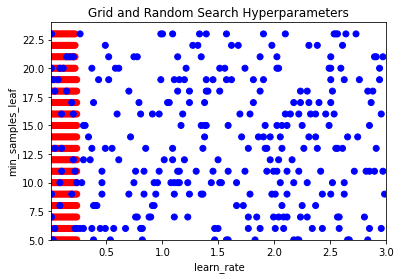

In [30]:
# Grid and Random Search Side by Side

def visualize_search(grid_combinations_chosen, random_combinations_chosen):
  grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
  rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

  # Plot all together
  x_lims, y_lims = [0.01, 3.0], [5, 24]
  plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
  plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
  plt.gca().set_xlim(x_lims)
  plt.gca().set_ylim(y_lims)
  plt.show()

learn_rate = np.linspace(0.01, 3, 200)
min_samples_leaf = list(range(5,24))

# Combination list
combinations_list = [list(x) for x in product(learn_rate, min_samples_leaf)]

# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)

## 4. Informed Search

In [34]:
import pandas as pd

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/results.csv'
results_df = pd.read_csv(filename)

3800
    Unnamed: 0  max_depth  min_samples_leaf  learn_rate  accuracy
1          152         10                14    0.477450        97
4           45          6                12    0.771275        97
2          324          7                14    0.050067        96
3          486          5                12    0.023356        96
5          252         13                11    0.290470        96
6            2          6                10    0.317181        96
7          137         19                10    0.757919        96
8          301          2                16    0.931544        96
9          307         16                13    0.904832        96
10         362         12                13    0.891477        96
Index(['Unnamed: 0', 'max_depth', 'min_samples_leaf', 'learn_rate',
       'accuracy'],
      dtype='object')


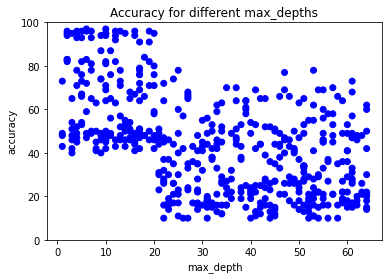

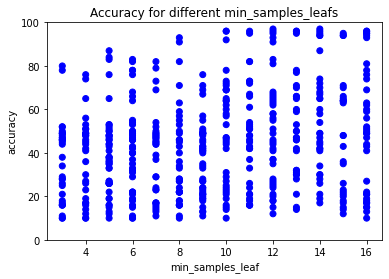

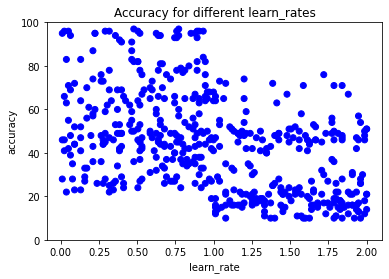

In [35]:
# Informed Search: Coarse to Fine

def visualize_hyperparameter(name):
  plt.clf()
  plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
  plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
  plt.gca().set_ylim([0,100])
  plt.show()

# Confirm the size of the combinations_list
print(len(combinations_list))

# Sort the results_df by accuracy and print the top 10 rows
print(results_df.sort_values(by='accuracy', ascending=False).head(10))

# Confirm which hyperparameters were used in this search
print(results_df.columns)

# Call visualize_hyperparameter() with each hyperparameter in turn
visualize_hyperparameter('max_depth')
visualize_hyperparameter('min_samples_leaf')
visualize_hyperparameter('learn_rate')

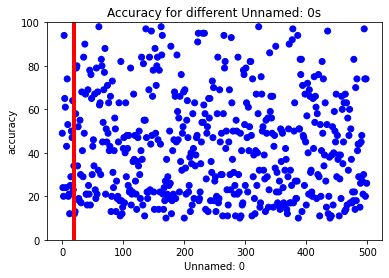

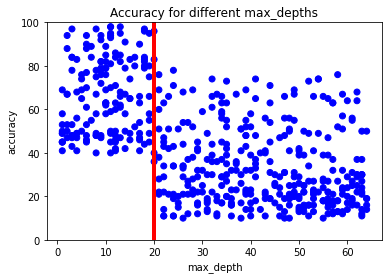

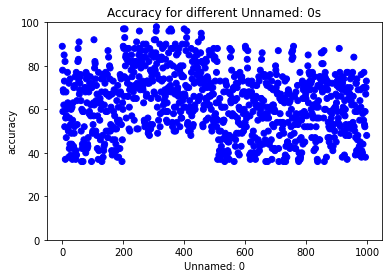

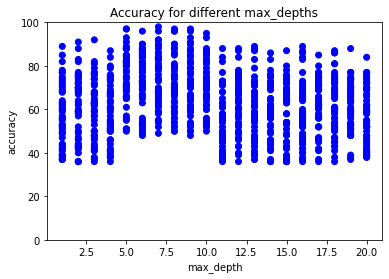

In [39]:
# Coarse to Fine Iterations

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/lesson_4_2_results_df.csv'
results_df = pd.read_csv(filename)

filename = 'https://raw.githubusercontent.com/chesterheng/ai-for-industry/main/datasets/lesson_4_1_results_dfITER.csv'
results_df_2 = pd.read_csv(filename)

def visualize_first():
  for name in results_df.columns[0:2]:
    plt.clf()
    plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])
    x_line = 20
    if name == "learn_rate":
      	x_line = 1
    plt.axvline(x=x_line, color="red", linewidth=4)
    plt.show() 

def visualize_second():
  for name in results_df_2.columns[0:2]:
    plt.clf()
    plt.scatter(results_df_2[name],results_df_2['accuracy'], c=['blue']*1000)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])
    plt.show()

# Use the provided function to visualize the first results
visualize_first()

# Create some combinations lists & combine
max_depth_list = list(range(1, 21))
learn_rate_list = np.linspace(0.001, 1, 50)

# Call the function to visualize the second results
visualize_second()

In [40]:
# Informed Search: Bayesian Statistics

# Bayes Rule in Python

# Assign probabilities to variables 
p_unhappy = 0.15
p_unhappy_close = 0.35

# Probabiliy someone will close
p_close = 0.07

# Probability unhappy person will close
p_close_unhappy = (p_unhappy_close * p_close) / p_unhappy
print(p_close_unhappy)

0.16333333333333336


In [41]:
# Bayesian Hyperparameter tuning with Hyperopt

from hyperopt import hp, fmin, tpe
from sklearn.model_selection import cross_val_score
# Set up space dictionary with specified hyperparameters
space = {'max_depth': hp.quniform('max_depth', 2, 10, 2),'learning_rate': hp.uniform('learning_rate', 0.001, 0.9)}

# Set up objective function
def objective(params):
    params = {'max_depth': int(params['max_depth']),'learning_rate': params['learning_rate']}
    gbm_clf = GradientBoostingClassifier(n_estimators=100, **params) 
    best_score = cross_val_score(gbm_clf, X_train, y_train, scoring='accuracy', cv=2, n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# Run the algorithm
best = fmin(fn=objective,space=space, max_evals=20, rstate=np.random.RandomState(42), algo=tpe.suggest)
print(best)

100%|██████████| 20/20 [00:30<00:00,  1.50s/it, best loss: 0.18625000000000003]
{'learning_rate': 0.8454933941048917, 'max_depth': 8.0}


In [45]:
# Informed Search: Genetic Algorithms

# Genetic Hyperparameter Tuning with TPOT

# !pip install tpot
from tpot import TPOTClassifier

# Assign the values outlined to the inputs
number_generations = 3
population_size = 4
offspring_size = 3
scoring_function = 'accuracy'
# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=number_generations, population_size=population_size,
                          offspring_size=offspring_size, scoring=scoring_function,
                          verbosity=2, random_state=2, cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.826875

Generation 2 - Current best internal CV score: 0.826875

Generation 3 - Current best internal CV score: 0.826875

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=9)
0.80375


In [46]:
# Analysing TPOT's stability

# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=42)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.823125

Generation 2 - Current best internal CV score: 0.823125

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
0.8075


In [47]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=122)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.80375

Generation 2 - Current best internal CV score: 0.82375

Best pipeline: LogisticRegression(RobustScaler(input_matrix), C=0.5, dual=False, penalty=l2)
0.805


In [48]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=99)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.80625

Generation 2 - Current best internal CV score: 0.825

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=14, min_samples_split=4, n_estimators=100)
0.805
